# Q.2 Illustrating the taxi problem
Using this resource for the entire taxi problem: https://www.learndatasci.com/tutorials/reinforcement-q-learning-scratch-python-openai-gym/

In [37]:
import sys
sys.path.append("c:/users/iftek/appdata/local/conda/conda/envs/gym/lib/site-packages")
import gym
from gym import spaces
from IPython.display import clear_output
from time import sleep
import numpy as np
from matplotlib import pyplot as plt
import math
from sklearn.preprocessing import KBinsDiscretizer

In [38]:
env = gym.make("Taxi-v3").env

state = env.encode(3, 1, 2, 0) # (taxi row, taxi column, passenger index, destination index)
print("State:", state)

env.s = state
#env.reset() # reset environment to a new, random state
env.render()


print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

State: 328
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Action Space Discrete(6)
State Space Discrete(500)


In [39]:
env.P[328]

{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

# Taxi problem using random actions

In [40]:
env.s = 328  # set environment to illustration's state

epochs = 0
penalties, reward = 0, 0

frames = [] # for animation

done = False

while not done:
    action = env.action_space.sample()
    state, reward, done, info = env.step(action)

    if reward == -10:
        penalties += 1
    
    # Put each rendered frame into dict for animation
    frames.append({
        'frame': env.render(mode='ansi'),
        'state': state,
        'action': action,
        'reward': reward
        }
    )

    epochs += 1
    
    
print("Timesteps taken: {}".format(epochs))
print("Penalties incurred: {}".format(penalties))

Timesteps taken: 5172
Penalties incurred: 1657


In [41]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.1)
        
print_frames(frames)

# Taxi problem using Q learning

In [42]:
import numpy as np
q_table = np.zeros([env.observation_space.n, env.action_space.n])

In [43]:
%%time
"""Training the agent"""

import random
from IPython.display import clear_output

# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1

# For plotting metrics
all_epochs = []
all_penalties = []

for i in range(1, 100001):
    state = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    done = False
    
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values

        next_state, reward, done, info = env.step(action) 
        
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        if reward == -10:
            penalties += 1

        state = next_state
        epochs += 1
        
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")

Episode: 100000
Training finished.

Wall time: 30.4 s


In [44]:
q_table[328]

array([ -2.41169245,  -2.27325184,  -2.40935893,  -2.36016685,
       -11.00264127, -10.96382989])

In [45]:
"""Evaluate agent's performance after Q-learning"""

total_epochs, total_penalties = 0, 0
episodes = 100

for _ in range(episodes):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0
    
    done = False
    
    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)

        if reward == -10:
            penalties += 1

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")

Results after 100 episodes:
Average timesteps per episode: 13.05
Average penalties per episode: 0.0


In [46]:
"""Evaluate agent's performance without Q-learning"""

total_epochs, total_penalties = 0, 0
episodes = 100

for _ in range(episodes):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0
    
    done = False
    
    while not done:
        action = env.action_space.sample()
        state, reward, done, info = env.step(action)

        if reward == -10:
            penalties += 1

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")

Results after 100 episodes:
Average timesteps per episode: 2202.37
Average penalties per episode: 710.91


# Q.4 Illustrating CartPole problem

In [79]:
env = gym.make("CartPole-v0")
env.reset()

array([ 0.04439758, -0.01793098,  0.04450275,  0.03903919])

In [80]:
print("Action Space {}".format(env.action_space.n))
print("State Space {}".format(env.observation_space.shape[0]))

Action Space 2
State Space 4


# Cartpole using random weights
Using this resource: http://kvfrans.com/simple-algoritms-for-solving-cartpole/

In [81]:
parameters = np.random.rand(4) * 2 - 1


In [82]:
def run_episode(env, parameters):
    observation = env.reset()
    totalreward = 0
    for _ in range(200):
        #env.render()
        action = 0 if np.matmul(parameters,observation) < 0 else 1
        observation, reward, done, info = env.step(action)
        totalreward += reward
        if done:
            break
    return totalreward

In [83]:
%%time

results = []
timeSteps = []
bestparams = None  
bestreward = 0  
for _ in range(1000):  
    parameters = np.random.rand(4) * 2 - 1
    reward = run_episode(env,parameters)
    if reward > bestreward:
        bestreward = reward
        bestparams = parameters
        # considered solved if the agent lasts 200 timesteps
        if reward == 200:
            timeSteps.append(200)
            break
    timeSteps.append(reward)
env.close()

Wall time: 7.98 ms


Text(0, 0.5, 'Timesteps')

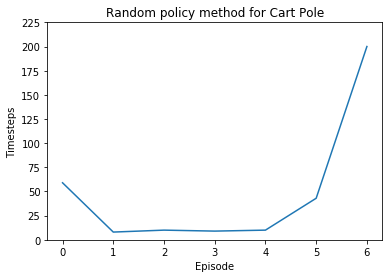

In [84]:
plt.plot(timeSteps)
plt.title("Random policy method for Cart Pole")
plt.xlabel("Episode")
plt.ylim(0, 225)
plt.ylabel("Timesteps")

#  Cartpole using Q-learning
I followed a youtube video and got the link for this github resource:
https://github.com/RJBrooker/Q-learning-demo-Cartpole-V1/blob/master/cartpole.ipynb
Video link:
https://www.youtube.com/watch?v=JNKvJEzuNsc


In [85]:
#Convert Cartpoles continues state space into discrete one
from typing import Tuple

n_bins = ( 6 , 12 )
lower_bounds = [ env.observation_space.low[2], -math.radians(50) ]
upper_bounds = [ env.observation_space.high[2], math.radians(50) ]

def discretizer( _ , __ , angle, pole_velocity ) -> Tuple[int,...]:
    """Convert continues state intro a discrete state"""
    est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
    est.fit([lower_bounds, upper_bounds ])
    return tuple(map(int,est.transform([[angle, pole_velocity]])[0]))



In [86]:
#Initialise the Q table
Q_table = np.zeros(n_bins + (env.action_space.n,))
Q_table.shape

(6, 12, 2)

In [87]:
def policy( state : tuple ):
    """Choosing action based on epsilon-greedy policy"""
    return np.argmax(Q_table[state])

In [88]:
def new_Q_value( reward,  new_state : tuple , discount_factor=1 ) -> float:
    """Temperal diffrence for updating Q-value of state-action pair"""
    future_optimal_value = np.max(Q_table[new_state])
    learned_value = reward + discount_factor * future_optimal_value
    return learned_value

In [89]:
# Adaptive learning of Learning Rate
def learning_rate(n : int , min_rate=0.01 ) -> float  :
    """Decaying learning rate"""
    return max(min_rate, min(1.0, 1.0 - math.log10((n + 1) / 25)))

In [90]:
def exploration_rate(n : int, min_rate= 0.1 ) -> float :
    """Decaying exploration rate"""
    return max(min_rate, min(1, 1.0 - math.log10((n  + 1) / 25)))

In [91]:
#Training our agent
n_episodes = 1000
for e in range(n_episodes):
    
    # Siscretize state into buckets
    current_state, done = discretizer(*env.reset()), False
    
    while done==False:
        
        # policy action 
        action = policy(current_state) # exploit
        
        # insert random action
        if np.random.random() < exploration_rate(e) : 
            action = env.action_space.sample() # explore 
         
        # increment enviroment
        obs, reward, done, _ = env.step(action)
        new_state = discretizer(*obs)
        
        # Update Q-Table
        lr = learning_rate(e)
        learnt_value = new_Q_value(reward , new_state )
        old_value = Q_table[current_state][action]
        Q_table[current_state][action] = (1-lr)*old_value + lr*learnt_value
        
        current_state = new_state
 # print the episode number every 100 episodes for the user to keep track of progress of training
    if e % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {e}")

print("Training finished.\n")       

Episode: 900
Training finished.



In [92]:
"""Evaluate agent's performance after Q-learning"""
total_epochs = 0
episodes = 100
timesteps = []

for i in range(episodes):
    # discretise the state
    state = discretizer(*env.reset())
    epochs, reward = 0, 0    
    done = False
    
    while not done:
        action = policy(state)
        state, reward, done, info = env.step(action)
        state = discretizer(*state)
        
        epochs += 1
      
    total_epochs += epochs
    timesteps.append(epochs)

env.close()

clear_output(wait=True)
average_timestep = total_epochs / episodes
# print results to screen
print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {average_timestep}")

Results after 100 episodes:
Average timesteps per episode: 200.0


Text(0, 0.5, 'Timesteps')

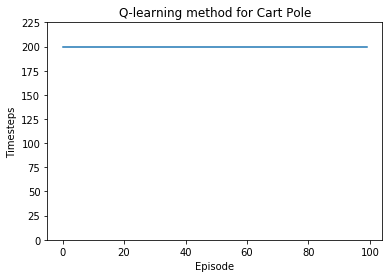

In [94]:
plt.plot(timesteps)
plt.title("Q-learning method for Cart Pole")
plt.xlabel("Episode")
plt.ylim(0, 225)
plt.ylabel("Timesteps")

# Q.6 Mountain Car using Q-learning
Using a github resource for this part: https://gist.github.com/gkhayes/3d154e0505e31d6367be22ed3da2e955#file-mountain_car-py

In [66]:
env = gym.make('MountainCar-v0')
env.reset()

array([-0.59869755,  0.        ])

In [67]:
# discretizer method
def discretizer(state):
    result = (state - env.observation_space.low) * np.array([10, 100])
    result = np.round(result, 0).astype(int)
    
    return result

# method to determine the shape of the discretized state space to create the Q-table with
def getDiscreteStateSize(env):
    result = (env.observation_space.high - env.observation_space.low) * np.array([10, 100])
    result = np.round(result, 0).astype(int) + 1
    
    return result

# Hyperparameters
alpha = 0.2
gamma = 0.9
epsilon = 0.8

# global variables
episodes = 10000
last_ten_episodes = episodes - 10

# get shape of discretized state space
num_states = getDiscreteStateSize(env)

# Initialize Q table    
Q = np.zeros((num_states[0], num_states[1], env.action_space.n))

# Initialize variables to track rewards
rewards = []
average_rewards = []

# Calculate reduction in the episilon value per episode
reduction = epsilon / episodes


In [68]:
%%time

# Run Q learning algorithm
for i in range(episodes):
    # Initialize local variables
    done = False
    total_reward, reward = 0,0
    state = env.reset()

    # Discretize current state
    discretized_state = discretizer(state)

    while done != True:   

        # Determine next action based of an epsilon greedy strategy
        if np.random.random() < 1 - epsilon:
            # exploit known states
            action = np.argmax(Q[discretized_state[0], discretized_state[1]]) 
        else:
            #the state space
            action = np.random.randint(0, env.action_space.n)

        next_state, reward, done, info = env.step(action) 

        next_discretized_state = discretizer(next_state)

        # update the state corresponding to the end point for the car
        if done and next_state[0] >= 0.5:
            Q[discretized_state[0], discretized_state[1], action] = reward

        # Adjust Q value for current state
        else:
            q_value = alpha*(reward + 
                             gamma*np.max(Q[next_discretized_state[0], 
                                               next_discretized_state[1]]) - 
                             Q[discretized_state[0], discretized_state[1], action])

            Q[discretized_state[0], discretized_state[1], action] += q_value

        # Update total reward to include results from this episode and move the current state to the next state
        total_reward += reward
        discretized_state = next_discretized_state

    # decrease epsilon value with every episode untill it reaches 0
    if epsilon > 0:
        epsilon -= reduction

    # add the running total to the rewards array
    rewards.append(total_reward)

    # on every 100th episode
    if (i+1) % 100 == 0:
        # get the average of the last 100 episode and store this average in another list
        last_average_reward = np.mean(rewards)
        average_rewards.append(last_average_reward)
        
        # reset the rewards list for the next 100 episodes
        rewards = []
        
        # clear screen and output average to user
        clear_output(wait=True)
        print(f"Episode {i + 1} out of {episodes} episodes")
        print(f"Average for episode: {last_average_reward}")

env.close()

Episode 10000 out of 10000 episodes
Average for episode: -174.21
Wall time: 1min 5s


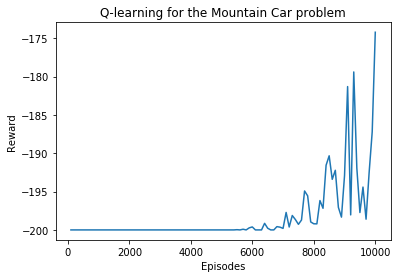

In [69]:
# Plot Rewards to show results

# plot each average value 100 data points away from each other
plt.plot(100*(np.arange(len(average_rewards)) + 1), average_rewards)
plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.title("Q-learning for the Mountain Car problem")
plt.show()